# AP1
## Ali Afsharian

In [1]:
#Import libraries
import glob
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import gaussian_kde
import math

import pyEOF
from pyEOF import *
import xarray as xr
from eofs.standard import Eof
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from pylab import rcParams

from matplotlib import pyplot as plt
import matplotlib.colors as mc
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings # supress warnings
warnings.filterwarnings('ignore')

Unable to determine R home: [WinError 2] The system cannot find the file specified
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.1\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Plot the location of the wind turbines

In [2]:
# Import data for all turbine
df_from_each_file = [pd.read_csv('https://odysseus.informatik.uni-oldenburg.de/download/Data/NREL/2006/{}.csv'.format(i)) 
                     for i in range(1,11)]
data_all = pd.concat(df_from_each_file, ignore_index=True)

In [3]:
data_meta = pd.read_csv('https://odysseus.informatik.uni-oldenburg.de/download/Data/NREL/site_meta.csv', 
                     header=0, index_col=0, parse_dates=True)

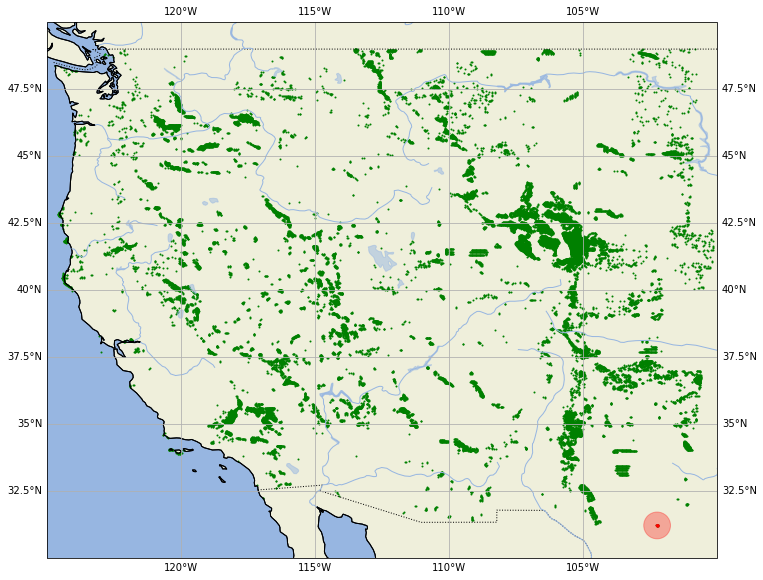

In [4]:
# Plot the location of all Turbines

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-100, -125, 30, 50], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

m_size = 1

lat = data_meta[' Latitude']
lon = data_meta[' Longitude']

data_selected = data_meta[(data_meta[' Longitude']<-102) & (data_meta[' Longitude']>-103) & 
                     (data_meta[' Latitude']>31) & (data_meta[' Latitude']<32)]


lat_selected = data_selected[' Latitude']
lon_selected = data_selected[' Longitude']

plt.scatter(lon,lat,color='green',s=m_size)
plt.scatter(lon_selected ,lat_selected ,color='red',s=m_size)
ax.add_patch(mpatches.Circle(xy=[np.mean(lon_selected), np.mean(lat_selected)], 
                             radius=0.5, color='red', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))


### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Data for Turbine ID1

In [5]:
# Import the data for turbineID1
data1 = pd.read_csv('https://odysseus.informatik.uni-oldenburg.de/download/Data/NREL/2006/1.csv', 
                    header=0, index_col=0, parse_dates=True)
data1.head()

100m wind speed (m/s)  \
Date(YYYY-MM-DD hh:mm:ss)                          
2006-01-01 00:00:00                         5.12   
2006-01-01 00:10:00                         5.12   
2006-01-01 00:20:00                         5.14   
2006-01-01 00:30:00                         5.17   
2006-01-01 00:40:00                         5.24   

                            rated power output at 100m (MW)  \
Date(YYYY-MM-DD hh:mm:ss)                                     
2006-01-01 00:00:00                                   1.788   
2006-01-01 00:10:00                                   1.788   
2006-01-01 00:20:00                                   1.812   
2006-01-01 00:30:00                                   1.848   
2006-01-01 00:40:00                                   1.929   

                            SCORE-lite power output at 100m (MW)  \
Date(YYYY-MM-DD hh:mm:ss)                                          
2006-01-01 00:00:00                                        2.012   
2006-01-01 00:10:00                                        2.227   
2006-01-01 00:20:00                                        0.130   
2006-01-01 00:30:00                                        2.311   
2006-01-01 00:40:00                                        1.849   

                           CorrectedScore  
Date(YYYY-MM-DD hh:mm:ss)                  
2006-01-01 00:00:00                 2.012  
2006-01-01 00:10:00                 2.227  
2006-01-01 00:20:00                 0.130  
2006-01-01 00:30:00                 2.311  
2006-01-01 00:40:00                 1.849

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2006-01-01 00:00:00 to 2006-12-31 23:50:00
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   100m wind speed (m/s)                  52560 non-null  float64
 1    rated power output at 100m (MW)       52560 non-null  float64
 2    SCORE-lite power output at 100m (MW)  52560 non-null  float64
 3   CorrectedScore                         52560 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [7]:
print ('Number of samples:', len(data1))

Number of samples: 52560


Text(0.5, 0, 'Time')

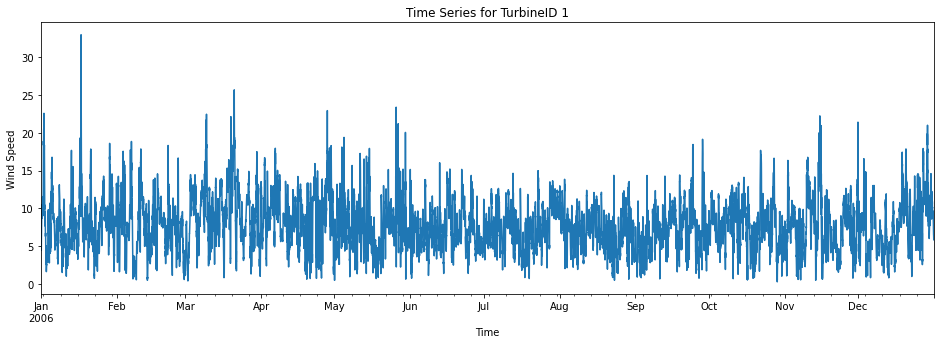

In [8]:
# Plot the time series for turbineID1 - whole year
plt.figure(figsize=(16, 5))
data1["100m wind speed (m/s)"].plot()
plt.title('Time Series for TurbineID 1')
plt.ylabel('Wind Speed')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

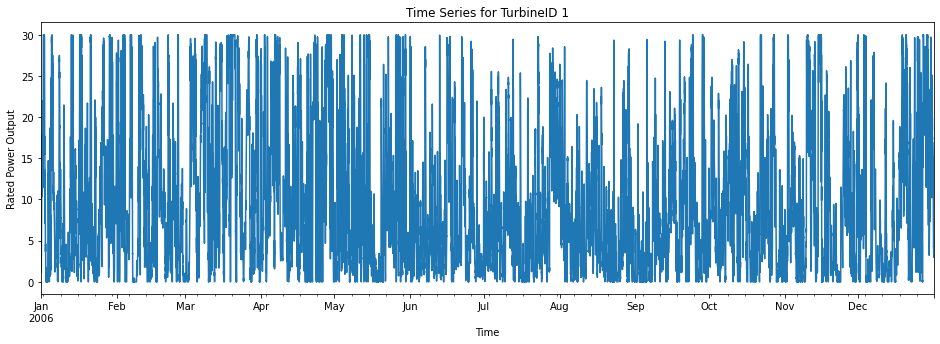

In [9]:
plt.figure(figsize=(16, 5))
data1[" rated power output at 100m (MW)"].plot()
plt.title('Time Series for TurbineID 1')
plt.ylabel('Rated Power Output')
plt.xlabel('Time')

In [10]:
# extracting the data for January
data1_Jan = data1['2006-01-01':'2006-01-31']

In [11]:
data1_Jan.tail()

100m wind speed (m/s)  \
Date(YYYY-MM-DD hh:mm:ss)                          
2006-01-31 23:10:00                        12.20   
2006-01-31 23:20:00                        11.95   
2006-01-31 23:30:00                        11.17   
2006-01-31 23:40:00                        10.82   
2006-01-31 23:50:00                        10.71   

                            rated power output at 100m (MW)  \
Date(YYYY-MM-DD hh:mm:ss)                                     
2006-01-31 23:10:00                                  24.315   
2006-01-31 23:20:00                                  23.391   
2006-01-31 23:30:00                                  20.325   
2006-01-31 23:40:00                                  18.861   
2006-01-31 23:50:00                                  18.390   

                            SCORE-lite power output at 100m (MW)  \
Date(YYYY-MM-DD hh:mm:ss)                                          
2006-01-31 23:10:00                                       26.878   
2006-01-31 23:20:00                                       22.563   
2006-01-31 23:30:00                                       20.754   
2006-01-31 23:40:00                                       18.891   
2006-01-31 23:50:00                                       20.031   

                           CorrectedScore  
Date(YYYY-MM-DD hh:mm:ss)                  
2006-01-31 23:10:00                26.878  
2006-01-31 23:20:00                22.563  
2006-01-31 23:30:00                20.754  
2006-01-31 23:40:00                18.891  
2006-01-31 23:50:00                20.031

Text(0.5, 0, 'Date')

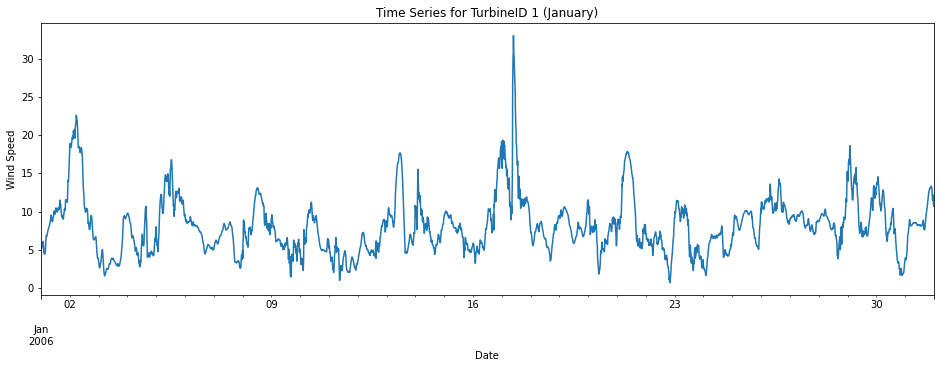

In [12]:
# Plot the wind speed time series for Turbine ID1
plt.figure(figsize=(16, 5))
data1_Jan["100m wind speed (m/s)"].plot()
plt.title('Time Series for TurbineID 1 (January)')
plt.ylabel('Wind Speed')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

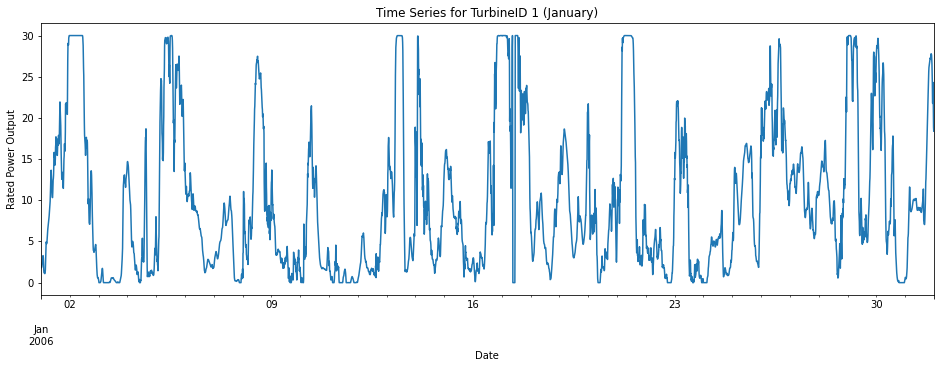

In [13]:
# Plotting the output power for turbine 1
plt.figure(figsize=(16, 5))
data1_Jan[" rated power output at 100m (MW)"].plot()
plt.title('Time Series for TurbineID 1 (January)')
plt.ylabel('Rated Power Output')
plt.xlabel('Date')

In [14]:
# Extract hour, day and wind speed data for turbineID1 in January
hour = data1_Jan.index.hour
day = data1_Jan.index.day
windspeed = data1_Jan['100m wind speed (m/s)']

In [15]:
d = {'hour':hour, 'day':day, 'windspeed':windspeed}
df = pd.DataFrame (data=d)

Text(0.5, 1.0, 'Heat Map of the wind speed for TurbineID1 (January)')

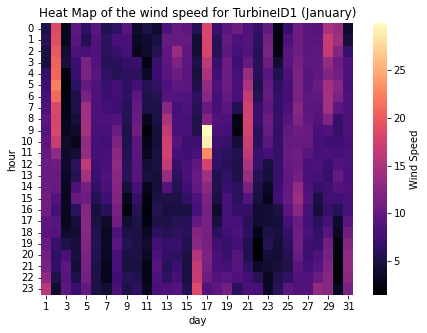

In [16]:
# Plot heatmap for Turbine ID1
import seaborn as sns
plt.figure(figsize=(7, 5))
hm1 = df.pivot_table(index="hour",columns="day",values="windspeed", aggfunc="mean")
sns.heatmap(hm1, annot=False, cmap="magma", cbar_kws={'label': 'Wind Speed'})
plt.title('Heat Map of the wind speed for TurbineID1 (January)')

Text(0.5, 0.97, 'Hourly Wind Speed (2006) - Turbine 1')

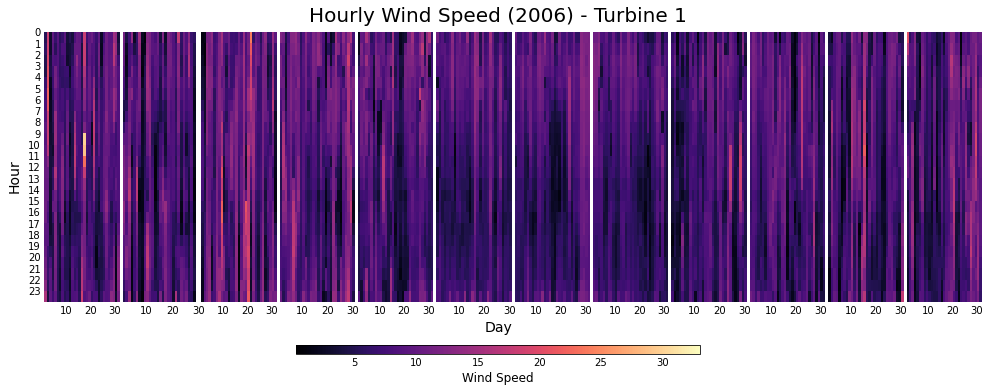

In [17]:
MIN_WS = data1['100m wind speed (m/s)'].min()
MAX_WS = data1['100m wind speed (m/s)'].max()

# Plot heatmap for whole year 2006 for Turbine ID1

def single_plot (data, month, ax):
    data = data[data.index.month == month]
    hour = data.index.hour
    day = data.index.day
    WindSpeed = data['100m wind speed (m/s)']
    #WindSpeed = WindSpeed.values.reshape(24, len(day.unique()), order="F")
    d = {'hour':hour, 'day':day, 'windspeed':WindSpeed}
    df = pd.DataFrame (data=d)
    WindSpeed = df.pivot_table(index="hour",columns="day",values="windspeed", aggfunc="mean")

    xgrid = np.arange(day.max() + 1) + 1
    ygrid = np.arange(25)
    
    ax.pcolormesh(xgrid, ygrid, WindSpeed, cmap="magma", vmin=MIN_WS, vmax=MAX_WS)
    # Invert the vertical axis
    ax.set_ylim(24, 0)
    # Set tick positions for both axes
    ax.yaxis.set_ticks([i for i in range(24)])
    ax.xaxis.set_ticks([10, 20, 30])
    # Remove ticks by setting their length to 0
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # Remove all spines
    ax.set_frame_on(False)
    

fig, axes = plt.subplots(1, 12, figsize=(14, 5), sharey=True)

for i in range(1,13):
    single_plot(data1, i, axes[i-1])
    
fig.subplots_adjust(left=0.05, right=0.98, top=0.9, hspace=0.08, wspace=0.04)


fig.subplots_adjust(bottom=0.15)

cbar_ax = fig.add_axes([0.3, 0.005, 0.4, 0.025])

# Create a normalizer that goes from minimum to maximum wind speed
norm = mc.Normalize(MIN_WS, MAX_WS)

# Create the colorbar and set it to horizontal
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="magma"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label
cb.set_label("Wind Speed", size=12)
#fig

# Set common labels for x and y axes
fig.text(0.5, 0.08, "Day", ha="center", va="center", fontsize=14)
fig.text(0.02, 0.5, 'Hour', ha="center", va="center", rotation="vertical", fontsize=14)

fig.suptitle("Hourly Wind Speed (2006) - Turbine 1", fontsize=20, y=0.97)
#fig

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Histogram of wind speed and output power Turbine ID1

Kurtosis = 0.881


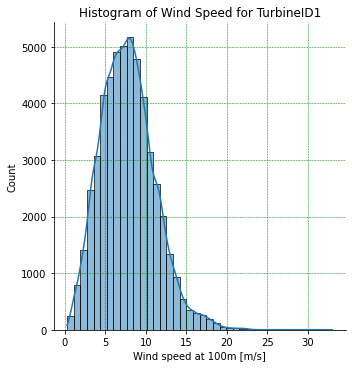

In [18]:
# Plot the wind speed histogram for Turbine ID1 
sns.displot(data1 ["100m wind speed (m/s)"], kde=True, bins = 40)
  
plt.title('Histogram of Wind Speed for TurbineID1')
plt.xlabel('Wind speed at 100m [m/s]')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

from scipy.stats import kurtosis
kur = kurtosis(data1 ["100m wind speed (m/s)"])
print ('Kurtosis =', round(kur,3))

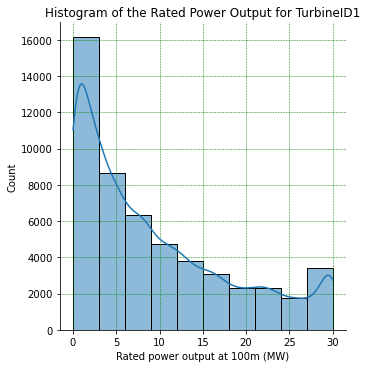

In [19]:
# Plotting the output power histogram for turbine 1
sns.displot(data1 [" rated power output at 100m (MW)"],kde=True,bins = 10)
  
plt.title('Histogram of the Rated Power Output for TurbineID1')
plt.xlabel('Rated power output at 100m (MW)')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Histogram for increment 10 and 60 min of wind speed Turbine ID1

In [20]:
# Distribution of wind speed for 10 min increment Turbine ID1
increment_10_wind = list()
for i in range (len(data1)-1):
    increment_10_wind.append (data1['100m wind speed (m/s)'][i]-data1['100m wind speed (m/s)'][i+1])

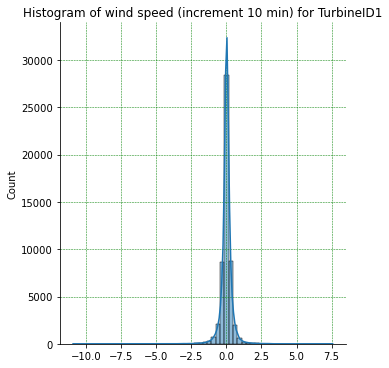

In [21]:
# plot the wind speed (increment 10 min) for Turbine ID1
sns.displot(increment_10_wind, kde=True, bins = 60)
  
plt.title('Histogram of wind speed (increment 10 min) for TurbineID1')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Standard Deviation = 0.44
Kurtosis = 1591.595


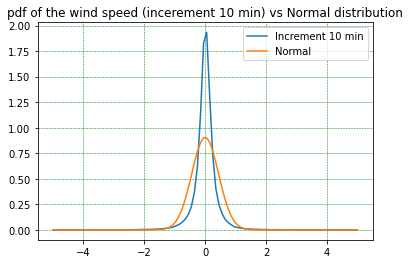

In [22]:
# Plot Normal distribution vs pdf of increment

std_10_wind = np.std(increment_10_wind)
kur_10_wind = kurtosis(increment_10_wind)/(std_10_wind**4)
print ('Standard Deviation =', round(std_10_wind,3))
print ('Kurtosis =', round(kur_10_wind,3))

mu = 0
sigma_10_wind = std_10_wind

plt.figure(figsize=(6, 4))

density_10_wind = gaussian_kde(increment_10_wind)
x=np.linspace(-5,5,100)
plt.plot(x,density_10_wind(x))
plt.plot(x, stats.norm.pdf(x, mu, sigma_10_wind))

plt.title('pdf of the wind speed (incerement 10 min) vs Normal distribution')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['Increment 10 min', 'Normal'])

In [23]:
# Distribution of wind speed for 1h increment Turbine ID1

increment_60_wind = list()
for i in range (len(data1)-6):
    increment_60_wind.append (data1['100m wind speed (m/s)'][i]-data1['100m wind speed (m/s)'][i+6])

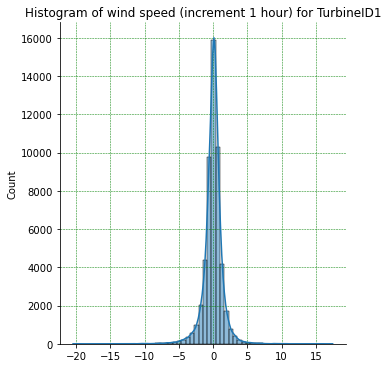

In [24]:
# Plotting the wind speed (increment 1h) histogram for Turbine 1
sns.displot(increment_60_wind, kde=True, bins = 60)
  
plt.title('Histogram of wind speed (increment 1 hour) for TurbineID1')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Standard Deviation = 1.391
Kurtosis = 3.675


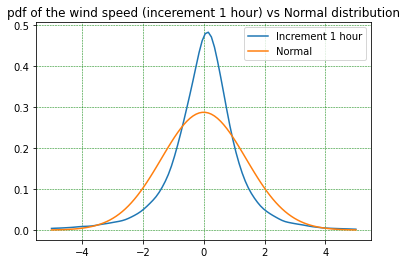

In [25]:
# Plot Normal distribution vs pdf of increment

std_60_wind = np.std(increment_60_wind)
kur_60_wind = kurtosis(increment_60_wind)/(std_60_wind**4)
print ('Standard Deviation =', round(std_60_wind,3))
print ('Kurtosis =', round(kur_60_wind,3))

mu = 0
sigma_60_wind = std_60_wind

plt.figure(figsize=(6, 4))

density_60_wind = gaussian_kde(increment_60_wind)
x=np.linspace(-5,5,100)
plt.plot(x,density_60_wind(x))
plt.plot(x, stats.norm.pdf(x, mu, sigma_60_wind))

plt.title('pdf of the wind speed (incerement 1 hour) vs Normal distribution')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['Increment 1 hour', 'Normal'])

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Histogram for increment 10 and 60 min of output power Turbine ID1

In [26]:
# Distribution of output power for 10 min increment Turbine ID1
increment_10_power = list()
for i in range (len(data1)-1):
    increment_10_power.append (data1[" rated power output at 100m (MW)"][i]-data1[" rated power output at 100m (MW)"][i+1])

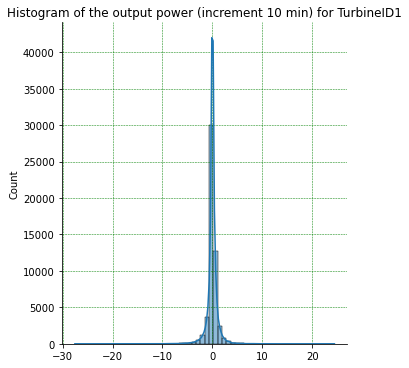

In [27]:
# plot the output power (increment 10 min) for Turbine ID1
sns.displot(increment_10_power, kde=True, bins = 60)
  
plt.title('Histogram of the output power (increment 10 min) for TurbineID1')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Standard Deviation = 1.183
Kurtosis = 31.142


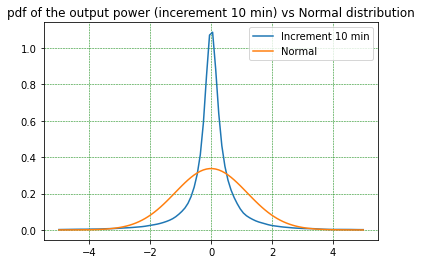

In [28]:
# Plot Normal distribution vs pdf of increment

std_10_power = np.std(increment_10_power)
kur_10_power = kurtosis(increment_10_power)/(std_10_power**4)
print ('Standard Deviation =', round(std_10_power,3))
print ('Kurtosis =', round(kur_10_power,3))

mu = 0
sigma_10_power = std_10_power

plt.figure(figsize=(6, 4))

density_10_power = gaussian_kde(increment_10_power)
x=np.linspace(-5,5,100)
plt.plot(x,density_10_power(x))
plt.plot(x, stats.norm.pdf(x, mu, sigma_10_power))

plt.title('pdf of the output power (incerement 10 min) vs Normal distribution')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['Increment 10 min', 'Normal'])

In [29]:
# Distribution of the output power for 1h increment Turbine ID1
increment_60_power = list()
for i in range (len(data1)-6):
    increment_60_power.append (data1[" rated power output at 100m (MW)"][i]-data1[" rated power output at 100m (MW)"][i+6])

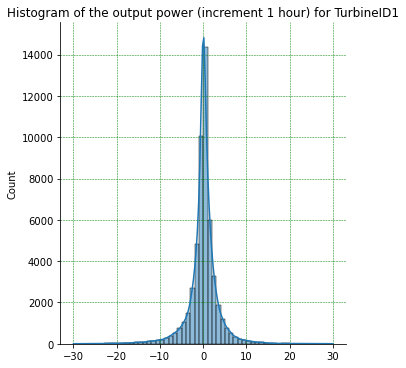

In [30]:
# Plot the output power (increment 1h) histogram for Turbine ID1
sns.displot(increment_60_power, kde=True, bins = 60)
  
plt.title('Histogram of the output power (increment 1 hour) for TurbineID1')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

Standard Deviation = 3.67
Kurtosis = 0.058


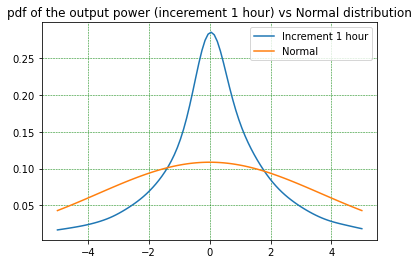

In [31]:
# Plot Normal distribution vs pdf of increment

std_60_power = np.std(increment_60_power)
kur_60_power = kurtosis(increment_60_power)/(std_60_power**4)
print ('Standard Deviation =', round(std_60_power,3))
print ('Kurtosis =', round(kur_60_power,3))

mu = 0
sigma_60_power = std_60_power

plt.figure(figsize=(6, 4))

density_60_power = gaussian_kde(increment_60_power)
x=np.linspace(-5,5,100)
plt.plot(x,density_60_power(x))
plt.plot(x, stats.norm.pdf(x, mu, sigma_60_power))

plt.title('pdf of the output power (incerement 1 hour) vs Normal distribution')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['Increment 1 hour', 'Normal'])

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Histogram of wind speed and output power for all Turbines 

In [32]:
# Construct Dataframe for Rated Power Output of all Turbines

k = len(data1)
PowerOut_dic = {}
for i in range(10):
    PowerOut_dic['TurbineID{}'.format(i+1)] = list(data_all[' rated power output at 100m (MW)'][i*k:(i+1)*k])

PowerOut_df = pd.DataFrame(data=PowerOut_dic)
#PowerOut_df

In [33]:
# Construct Dataframe for Wind Speed of all Turbines

k = len(data1)
WindSpeed_dic = {}
for i in range(10):
    WindSpeed_dic['TurbineID{}'.format(i+1)] = list(data_all['100m wind speed (m/s)'][i*k:(i+1)*k])

WindSpeed_df = pd.DataFrame(data=WindSpeed_dic)
#WindSpeed_df

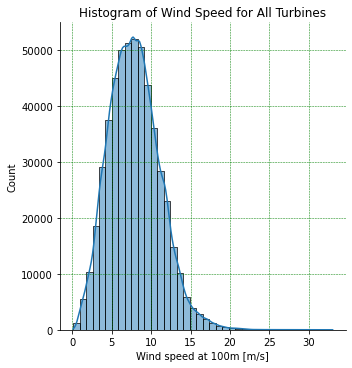

In [34]:
# Plotting histogram of wind speed for all turbines
sns.displot(data_all ["100m wind speed (m/s)"], kde=True, bins = 40)

plt.title('Histogram of Wind Speed for All Turbines')
plt.xlabel('Wind speed at 100m [m/s]')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

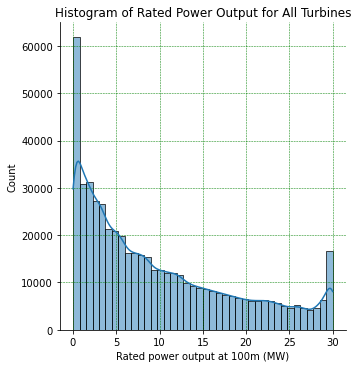

In [35]:
# Plotting histogram of output power for all turbines
sns.displot(data_all [" rated power output at 100m (MW)"], kde=True, bins = 40)
  
plt.title('Histogram of Rated Power Output for All Turbines')
plt.xlabel('Rated power output at 100m (MW)')
plt.ylabel('Count')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

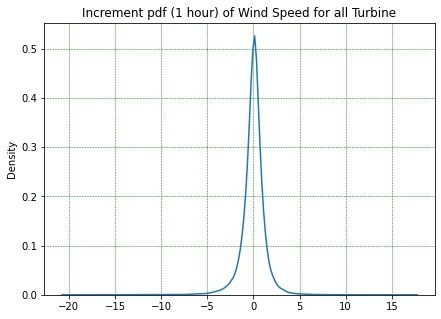

In [36]:
# Distribution of wind speed for 1h increment for all turbines
l_all = list()
for i in range(1,11):
    for j in range (len(WindSpeed_df)-6):
            l_all.append (WindSpeed_df['TurbineID{}'.format(i)][j]-WindSpeed_df['TurbineID{}'.format(i)][j+6])
            
# Plot 
plt.figure(figsize=(7, 5))
sns.kdeplot(l_all)
plt.title('Increment pdf (1 hour) of Wind Speed for all Turbine')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Scatter plots for all Turbines 

Text(0.5, 0.98, 'Scatter Plot of Wind Speed for 10 Turbines')

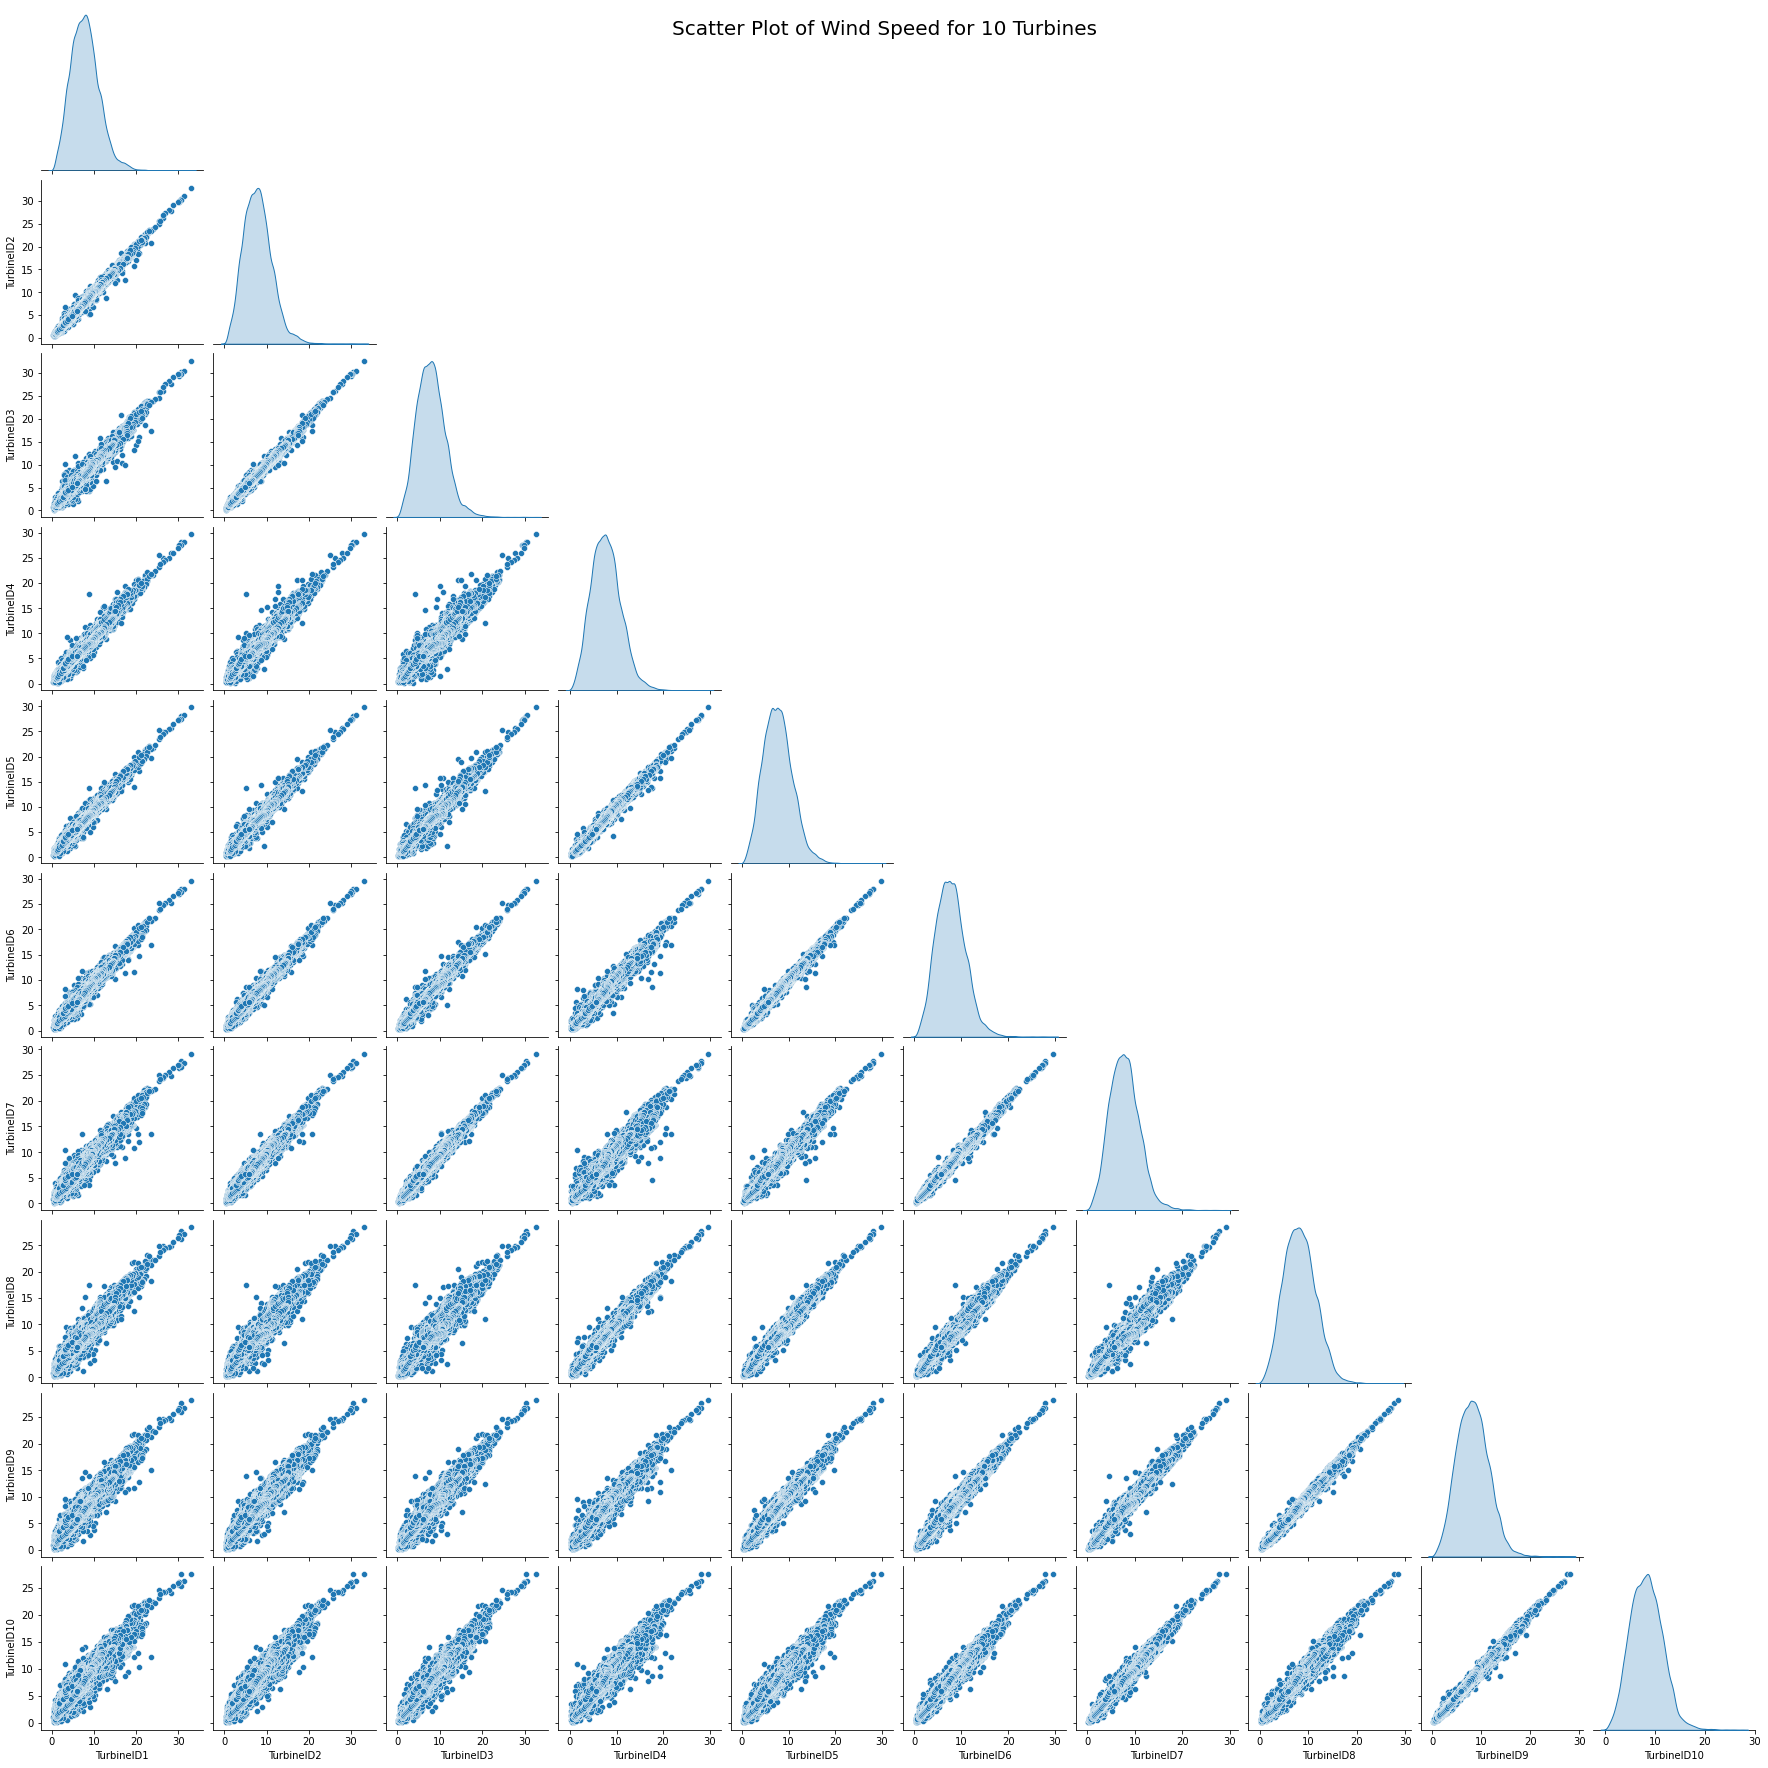

In [37]:
g = sns.pairplot(WindSpeed_df, diag_kind='kde', corner=True)
g.fig.suptitle('Scatter Plot of Wind Speed for 10 Turbines', fontsize = 20)

Text(0.5, 0.98, 'Scatter Plot of Rated Power Output for 10 Turbines')

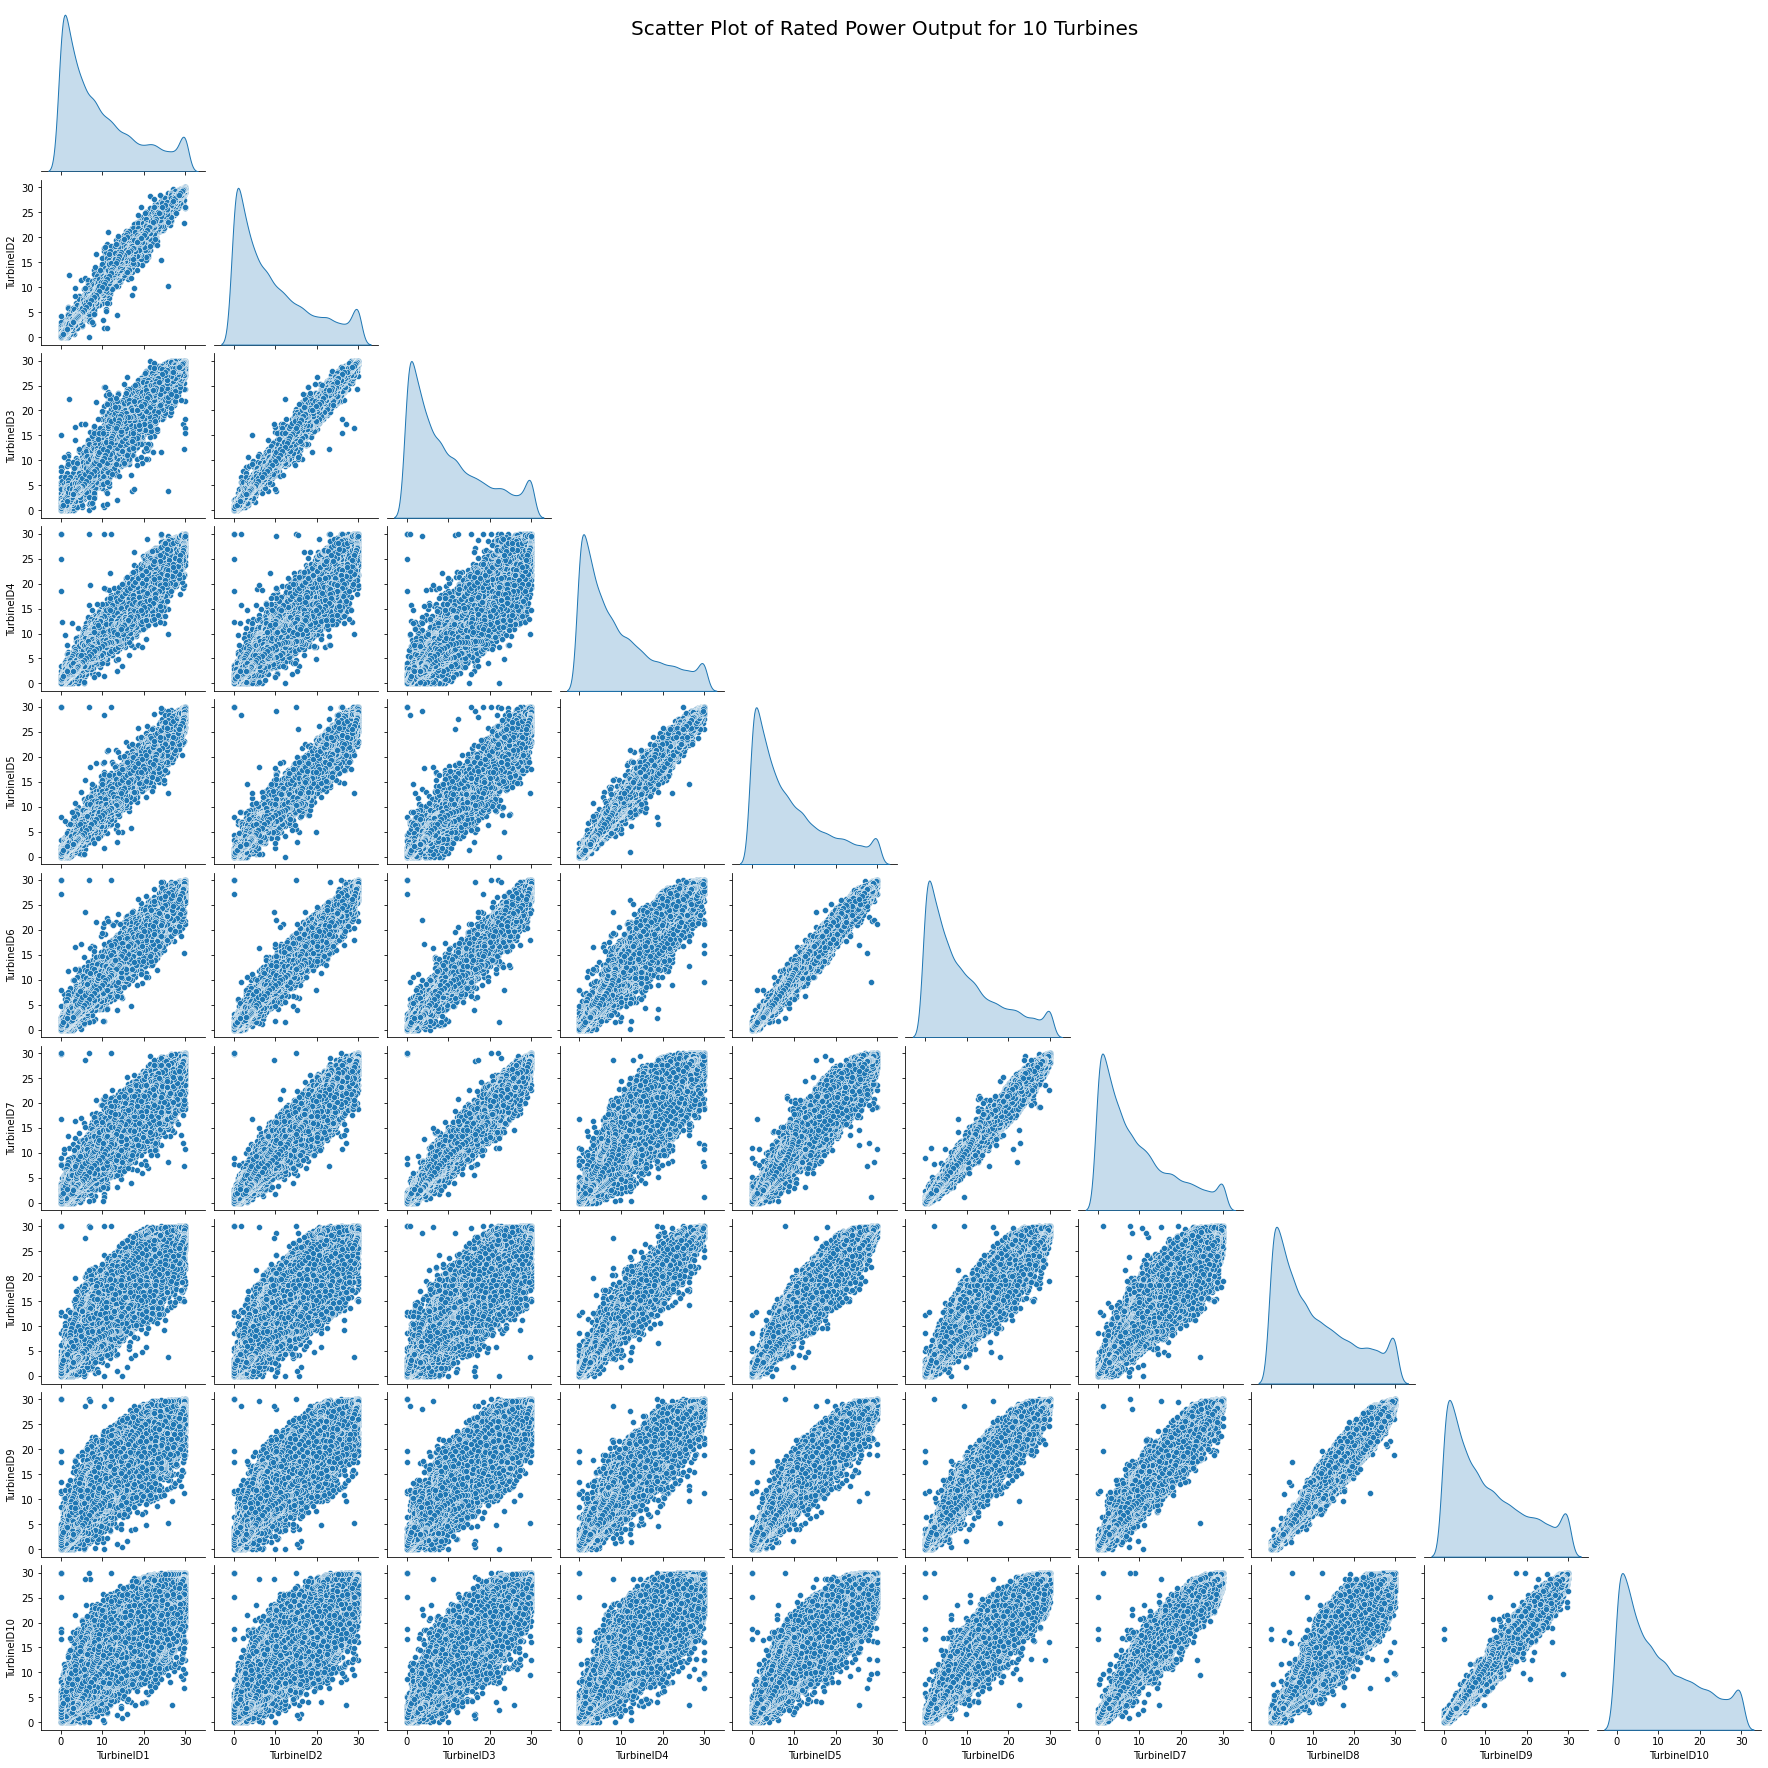

In [38]:
g = sns.pairplot(PowerOut_df, diag_kind='kde', corner=True)
g.fig.suptitle('Scatter Plot of Rated Power Output for 10 Turbines', fontsize = 20)

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Correlation all Turbines

Text(0.5, 1.0, 'Correlation for Wind Speed')

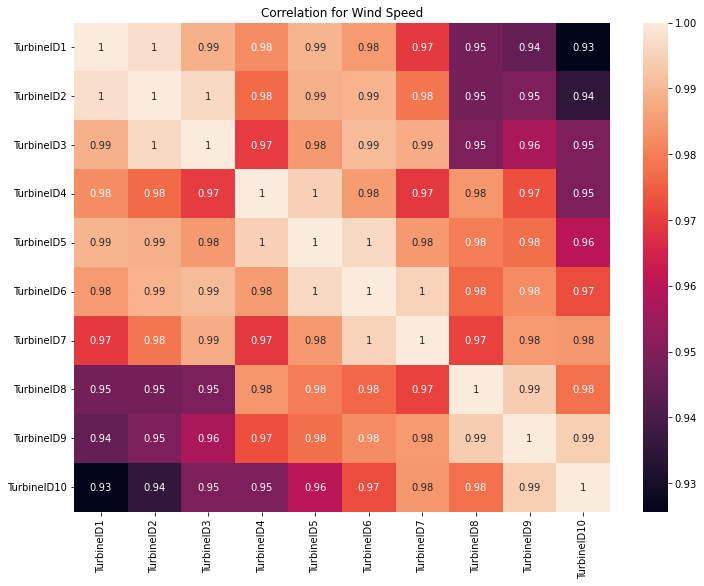

In [39]:
# Correlation matrix for Wind Speed
corrMatrix_WS = WindSpeed_df.corr()

# Plotting correlation matrix for wind speed
plt.figure(figsize=(12, 9))
sns.heatmap(corrMatrix_WS, annot=True)
plt.title('Correlation for Wind Speed')

Text(0.5, 1.0, 'Correlation for Rated Power Output')

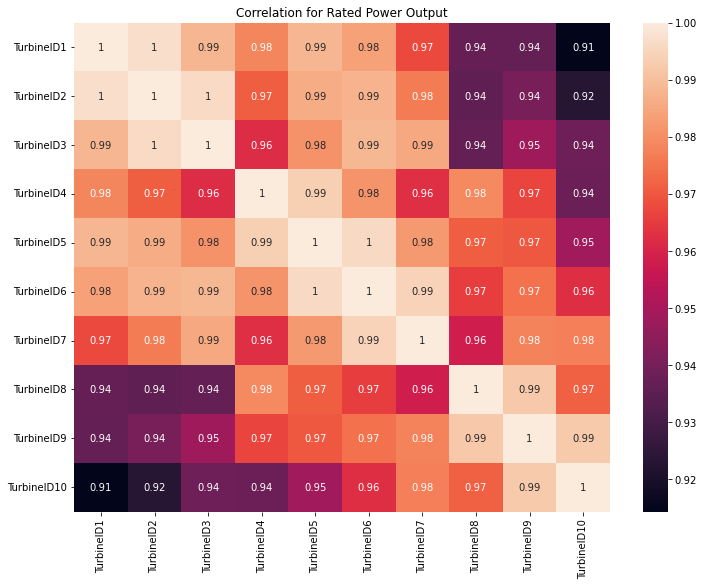

In [40]:
# Correlation matrix for rated output power
corrMatrix_PO = PowerOut_df.corr()

# Plotting correlation matrix for wind speed
plt.figure(figsize=(12, 9))
sns.heatmap(corrMatrix_PO, annot=True)
plt.title ('Correlation for Rated Power Output')

## ---------------------------------------------------------------------------------------------------------------------------------

## Comparing wind speed in different wind farm

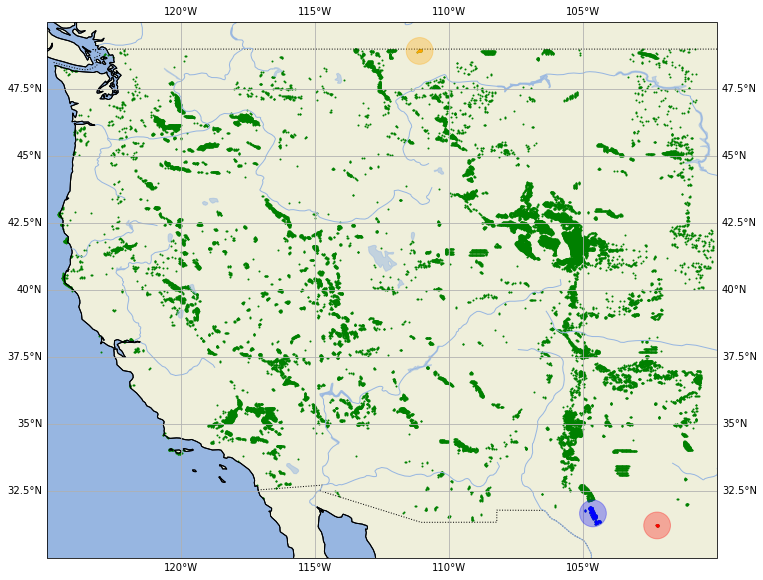

In [56]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-100, -125, 30, 50], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

m_size = 1

lat = data_meta[' Latitude']
lon = data_meta[' Longitude']

data_selected1 = data_meta[(data_meta[' Longitude']>-103) & (data_meta[' Latitude']<31.5)]
lat_selected1 = data_selected1[' Latitude']
lon_selected1 = data_selected1[' Longitude']

data_selected2 = data_meta[(data_meta[' Longitude']<-104) & (data_meta[' Longitude']>-105) & 
                     (data_meta[' Latitude']>31) & (data_meta[' Latitude']<32)]
lat_selected2 = data_selected2[' Latitude']
lon_selected2 = data_selected2[' Longitude']

data_selected3 = data_meta[(data_meta[' Longitude']<-110) & (data_meta[' Longitude']>-111.5) & 
                     (data_meta[' Latitude']>48) & (data_meta[' Latitude']<49)]
lat_selected3 = data_selected3[' Latitude']
lon_selected3 = data_selected3[' Longitude']

plt.scatter(lon, lat, color='green', s=m_size)
plt.scatter(lon_selected1, lat_selected1, color='red', s=m_size)
plt.scatter(lon_selected2, lat_selected2, color='blue', s=m_size)
plt.scatter(lon_selected3, lat_selected3, color='orange', s=m_size)


ax.add_patch(mpatches.Circle(xy=[np.mean(lon_selected1), np.mean(lat_selected1)], 
                             radius=0.5, color='red', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))
ax.add_patch(mpatches.Circle(xy=[np.mean(lon_selected2), np.mean(lat_selected2)], 
                             radius=0.5, color='blue', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))
ax.add_patch(mpatches.Circle(xy=[np.mean(lon_selected3), np.mean(lat_selected3)], 
                             radius=0.5, color='orange', alpha=0.3, transform=ccrs.PlateCarree(), zorder=30))

In [57]:
data11 = pd.read_csv('https://odysseus.informatik.uni-oldenburg.de/download/Data/NREL/2006/11.csv', 
                  header=0, index_col=0, parse_dates=True)
data30510 = pd.read_csv('https://odysseus.informatik.uni-oldenburg.de/download/Data/NREL/2006/30510.csv', 
                  header=0, index_col=0, parse_dates=True)

In [58]:
WindSpeed_dic_compare = {}

WindSpeed_dic_compare['TurbineID{}'.format(1)] = list(data1['100m wind speed (m/s)'])
WindSpeed_dic_compare['TurbineID{}'.format(11)] = list(data11['100m wind speed (m/s)'])
WindSpeed_dic_compare['TurbineID{}'.format(30510)] = list(data30510['100m wind speed (m/s)'])

WindSpeed_df_compare = pd.DataFrame(data=WindSpeed_dic_compare)

Text(0.5, 0.98, 'Scatter Plot of Wind Speed for Turbine ID1, 11, 30510')

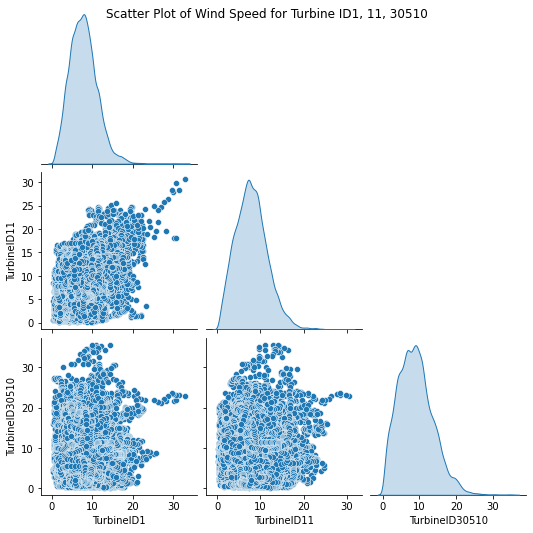

In [59]:
g = sns.pairplot(WindSpeed_df_compare, diag_kind='kde', corner=True)
g.fig.suptitle('Scatter Plot of Wind Speed for Turbine ID1, 11, 30510', fontsize = 12)

Text(0.5, 1.0, 'Correlation for Wind Speed of Turbine ID1, 11, 30510')

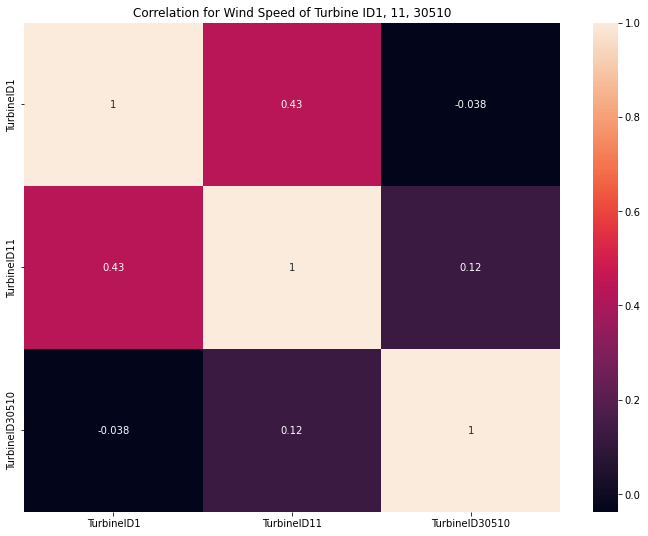

In [60]:
# Correlation matrix for Wind Speed
corrMatrix_WS_compare = WindSpeed_df_compare.corr()

# Plotting correlation matrix for wind speed
plt.figure(figsize=(12, 9))
sns.heatmap(corrMatrix_WS_compare, annot=True)
plt.title('Correlation for Wind Speed of Turbine ID1, 11, 30510')

## ---------------------------------------------------------------------------------------------------------------------------------

## EOF Analysis with pyEOF library

In [41]:
data_all_c = pd.DataFrame(columns=['time','wind speed','lat','lon'])
data_all_c['time'] = data_all['Date(YYYY-MM-DD hh:mm:ss)']
data_all_c['wind speed'] = data_all['100m wind speed (m/s)']

k = len(data1)
for i, t in enumerate(range(1,11)):
    data_all_c['lat'][i*k:(i+1)*k] = float(data_meta[data_meta.index == t][' Latitude'])
    data_all_c['lon'][i*k:(i+1)*k] = float(data_meta[data_meta.index == t][' Longitude'])
    

data_all_c['time'] =  pd.to_datetime(data_all_c['time'])
data_all_c

time  wind speed     lat      lon
0      2006-01-01 00:00:00        5.12  31.192 -102.242
1      2006-01-01 00:10:00        5.12  31.192 -102.242
2      2006-01-01 00:20:00        5.14  31.192 -102.242
3      2006-01-01 00:30:00        5.17  31.192 -102.242
4      2006-01-01 00:40:00        5.24  31.192 -102.242
...                    ...         ...     ...      ...
525595 2006-12-31 23:10:00        5.92  31.225 -102.208
525596 2006-12-31 23:20:00        5.86  31.225 -102.208
525597 2006-12-31 23:30:00        5.73  31.225 -102.208
525598 2006-12-31 23:40:00        5.74  31.225 -102.208
525599 2006-12-31 23:50:00        5.84  31.225 -102.208

[525600 rows x 4 columns]

In [42]:
df_data = pyEOF.get_time_space(data_all_c, time_dim = "time", lumped_space_dims = ["lat","lon"])
df_data

wind speed                                               \
lat                     31.192                     31.208                     
lon                   -102.242 -102.225 -102.208 -102.258 -102.242 -102.225   
time                                                                          
2006-01-01 00:00:00       5.12     5.29     5.47     4.69     5.03     5.31   
2006-01-01 00:10:00       5.12     5.30     5.48     4.75     5.10     5.38   
2006-01-01 00:20:00       5.14     5.33     5.53     4.84     5.17     5.45   
2006-01-01 00:30:00       5.17     5.37     5.58     4.92     5.25     5.53   
2006-01-01 00:40:00       5.24     5.43     5.66     5.03     5.36     5.63   
...                        ...      ...      ...      ...      ...      ...   
2006-12-31 23:10:00       6.24     6.33     6.42     5.84     5.89     5.95   
2006-12-31 23:20:00       6.14     6.25     6.37     5.70     5.77     5.85   
2006-12-31 23:30:00       5.95     6.07     6.20     5.54     5.61     5.68   
2006-12-31 23:40:00       5.86     5.95     6.07     5.53     5.56     5.61   
2006-12-31 23:50:00       5.85     5.90     5.98     5.58     5.59     5.63   

                                                         
lat                            31.225                    
lon                 -102.208 -102.242 -102.225 -102.208  
time                                                     
2006-01-01 00:00:00     5.51     5.17     5.59     5.83  
2006-01-01 00:10:00     5.57     5.28     5.70     5.93  
2006-01-01 00:20:00     5.65     5.41     5.81     6.04  
2006-01-01 00:30:00     5.73     5.53     5.93     6.14  
2006-01-01 00:40:00     5.83     5.69     6.08     6.29  
...                      ...      ...      ...      ...  
2006-12-31 23:10:00     5.99     5.84     5.90     5.92  
2006-12-31 23:20:00     5.92     5.72     5.82     5.86  
2006-12-31 23:30:00     5.76     5.63     5.70     5.73  
2006-12-31 23:40:00     5.67     5.68     5.73     5.74  
2006-12-31 23:50:00     5.66     5.80     5.85     5.84  

[52560 rows x 10 columns]

In [43]:
# Implement Rotated EOF (REOF)
n = 4
pca = pyEOF.df_eof(df_data, pca_type="varimax", n_components=n)

eofs = pca.eofs(s=0, n=n) # get eofs
eofs_da = eofs.stack(["lat","lon"]).to_xarray() # make it convenient for visualization
pcs = pca.pcs(s=0, n=n) # get pcs
evfs = pca.evf(n=n) # get variance fraction

eofs

wind speed                                                              \
lat     31.192                        31.208                                 
lon   -102.242  -102.225  -102.208  -102.258  -102.242  -102.225  -102.208   
EOF                                                                          
1     0.364971  0.367034  0.359513  0.308997  0.324207  0.325493  0.315092   
2    -0.250125 -0.263051 -0.285644 -0.287417 -0.294944 -0.312940 -0.338274   
3     0.327198  0.277838  0.226717  0.429097  0.357528  0.287744  0.219908   
4     0.127741 -0.088909 -0.333789  0.193216  0.544343  0.536329  0.335411   

                                   
lat    31.225                      
lon  -102.242  -102.225  -102.208  
EOF                                
1    0.256369  0.259691  0.252685  
2   -0.346002 -0.366996 -0.387666  
3    0.405123  0.318266  0.236267  
4   -0.334889  0.019175  0.134362

In [44]:
evfs

array([0.45742692, 0.42816092, 0.11306615, 0.00065603])

In [45]:
pcs

PC1       PC2       PC3       PC4
time                                                       
2006-01-01 00:00:00 -2.535153  2.542641 -2.553865 -0.888577
2006-01-01 00:10:00 -2.480914  2.478870 -2.493440 -0.861936
2006-01-01 00:20:00 -2.410635  2.400335 -2.417952 -0.836738
2006-01-01 00:30:00 -2.337834  2.320361 -2.340939 -0.807905
2006-01-01 00:40:00 -2.235522  2.209723 -2.233881 -0.770286
...                       ...       ...       ...       ...
2006-12-31 23:10:00 -1.794153  1.875637 -1.825282 -0.650987
2006-12-31 23:20:00 -1.883593  1.964636 -1.919313 -0.692455
2006-12-31 23:30:00 -2.035826  2.110924 -2.064207 -0.758880
2006-12-31 23:40:00 -2.088358  2.150793 -2.101818 -0.781695
2006-12-31 23:50:00 -2.068516  2.116252 -2.067470 -0.768505

[52560 rows x 4 columns]

In [46]:
# Reconstructing data for wind speed based on eofs and pcs
reconstructed_data =  pd.DataFrame(np.dot(pcs,eofs))
mean = WindSpeed_df.mean()
for i in range(10):
    reconstructed_data[i] += mean[i]
                                   
#reconstructed_data

Text(0.5, 1.0, 'Wind Speed for TurbineID 1 (January)')

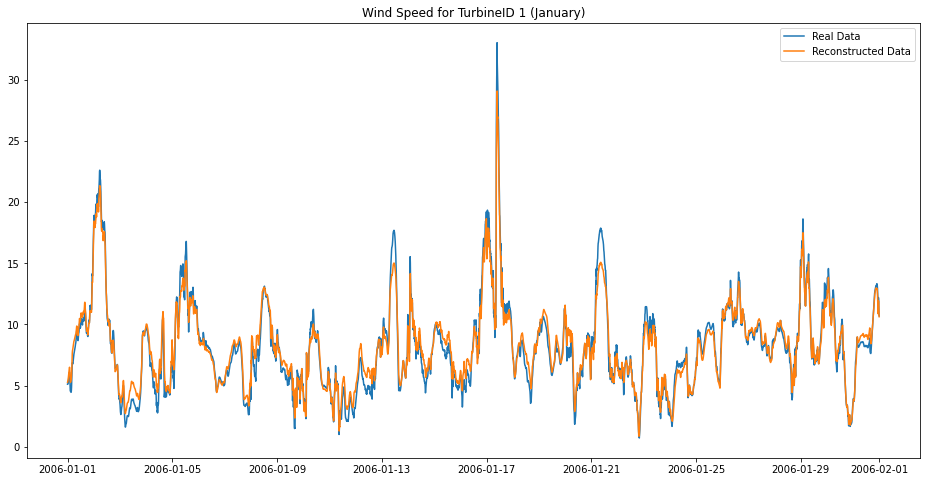

In [47]:
# Plotting reconstructed data for TurbineID 1 (January)

plt.figure(figsize=(16, 8))
plt.plot(data1_Jan.index, list(data1_Jan['100m wind speed (m/s)']))
plt.plot(data1_Jan.index, list(reconstructed_data[0][:len(data1_Jan)]))
plt.legend(['Real Data', 'Reconstructed Data'])
plt.title('Wind Speed for TurbineID 1 (January)')

In [48]:
# create a function for visualization convenience
def visualization(da, pcs, eofs_da, evf):
    fig = plt.figure(figsize = (15,18))

    ax = fig.add_subplot(n+1,2,1)
    da.mean(dim=["lat","lon"]).plot(ax=ax)
    ax.set_title("average wind speed")

    ax = fig.add_subplot(n+1,2,2)
    da.mean(dim="time").plot(ax=ax)
    ax.set_title("average wind speed")

    for i in range(1,n+1):
        pc_i = pcs["PC"+str(i)].to_xarray()
        eof_i = eofs_da.sel(EOF=i)["wind speed"]
        frac = str(np.array(evf[i-1]*100).round(2))

        ax = fig.add_subplot(n+1,2,i*2+1)
        pc_i.plot(ax=ax)
        ax.set_title("PC"+str(i)+" ("+frac+"%)")

        ax = fig.add_subplot(n+1,2,i*2+2)
        eof_i.plot(ax=ax,
                   vmin=-0.75, vmax=0.75, cmap="RdBu_r",
                   cbar_kwargs={'label': ""})
        ax.set_title("EOF"+str(i)+" ("+frac+"%)")

    plt.tight_layout()
    plt.show()

In [49]:
df_data_s = data_all_c
df_data_s = df_data_s.set_index(['time','lat','lon'])
#df_data_s

In [50]:
da = df_data_s.to_xarray()
#da

In [51]:
da = da.to_array()
#type(da)

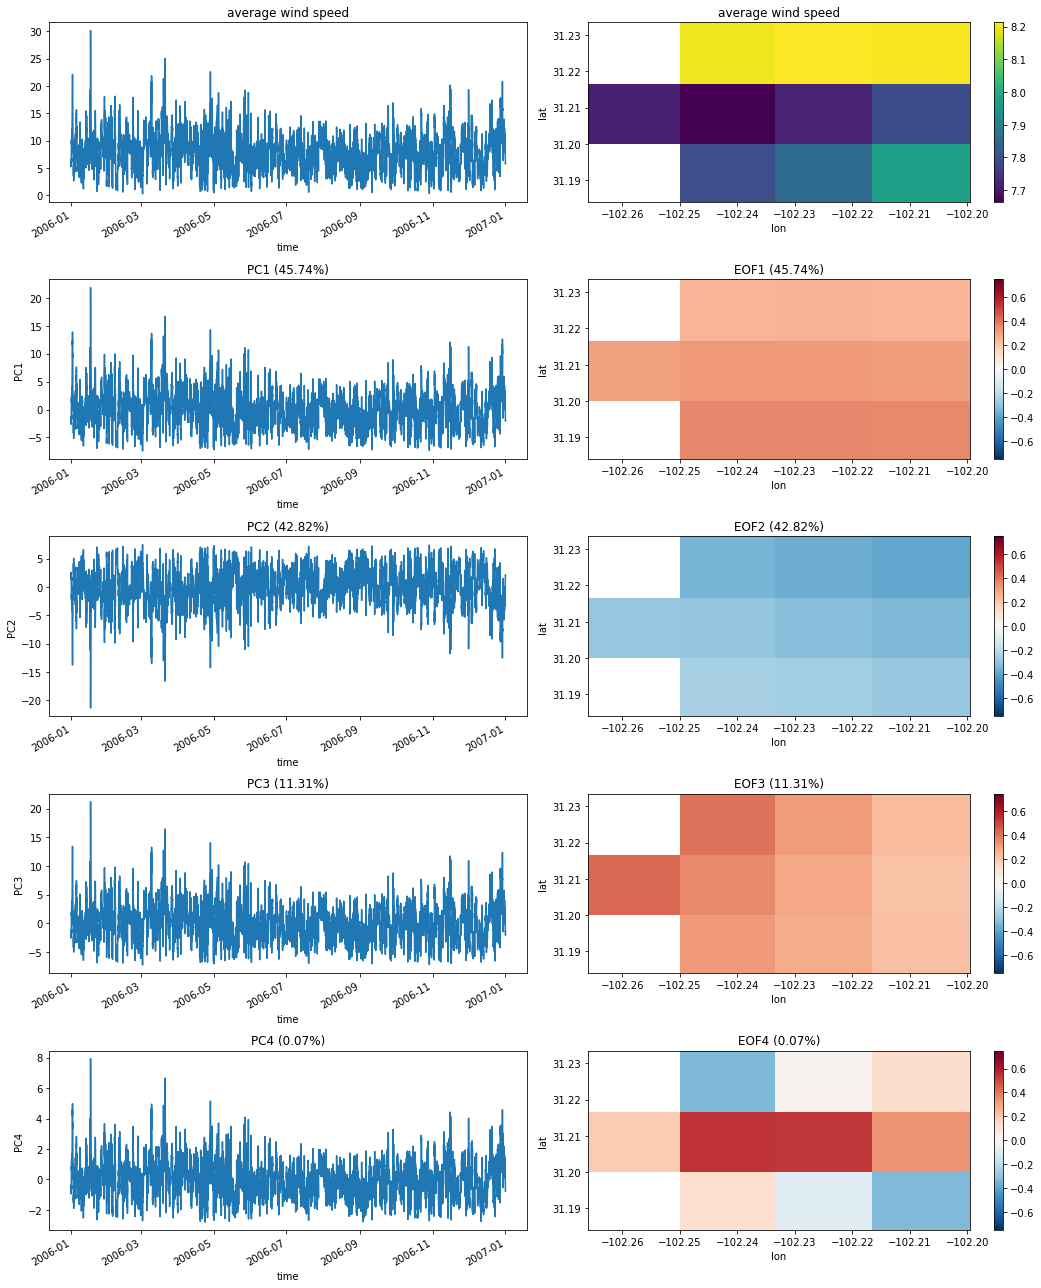

In [52]:
# plot
visualization(da, pcs, eofs_da, evfs)

## ---------------------------------------------------------------------------------------------------------------------------------

## Decompose time series 

Text(0.5, 1.03, 'Additive Decompose for TurbineID 1')

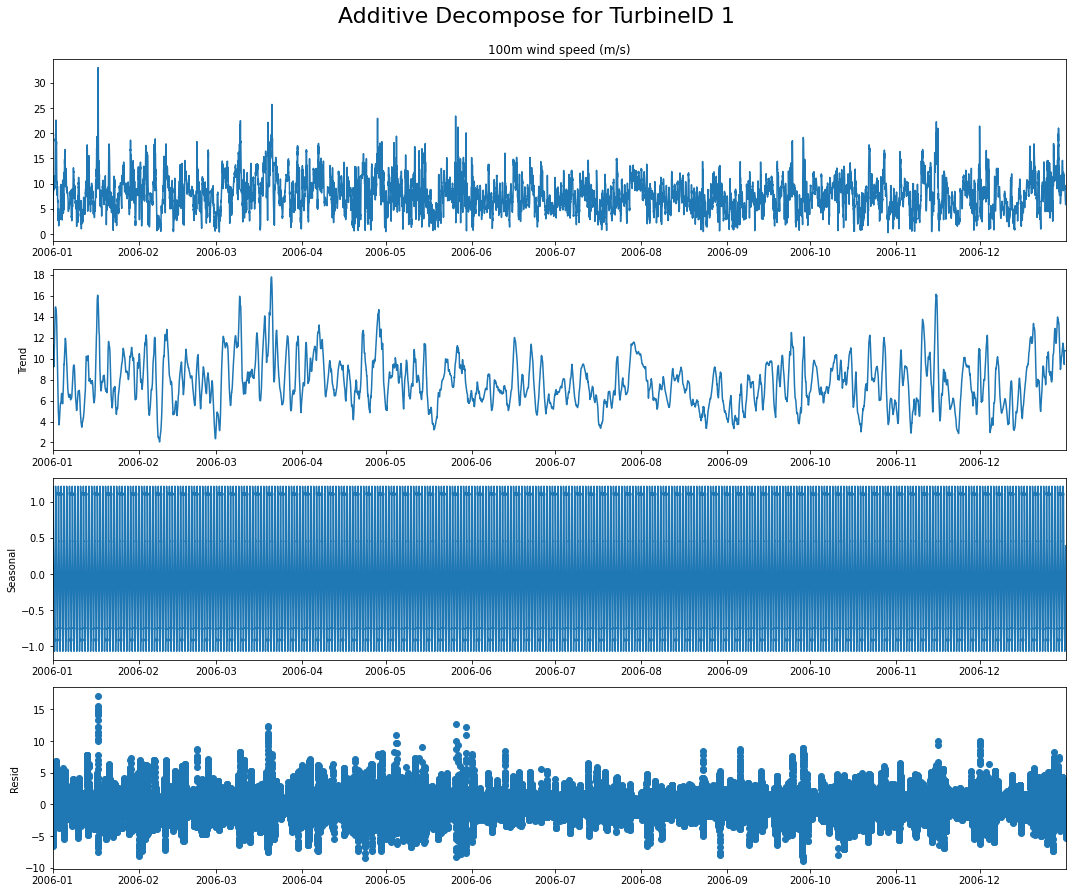

In [53]:
# Decompose the time series for turbineID1
rcParams['figure.figsize'] = 15, 12

# Additive Decomposition
result_add = seasonal_decompose(data1 ["100m wind speed (m/s)"], model='additive', extrapolate_trend='freq', period=6*24)
# Plot
result_add.plot().suptitle('Additive Decompose for TurbineID 1', fontsize=22,y=1.03)

## ---------------------------------------------------------------------------------------------------------------------------------

## EOF Analysis with eofs library

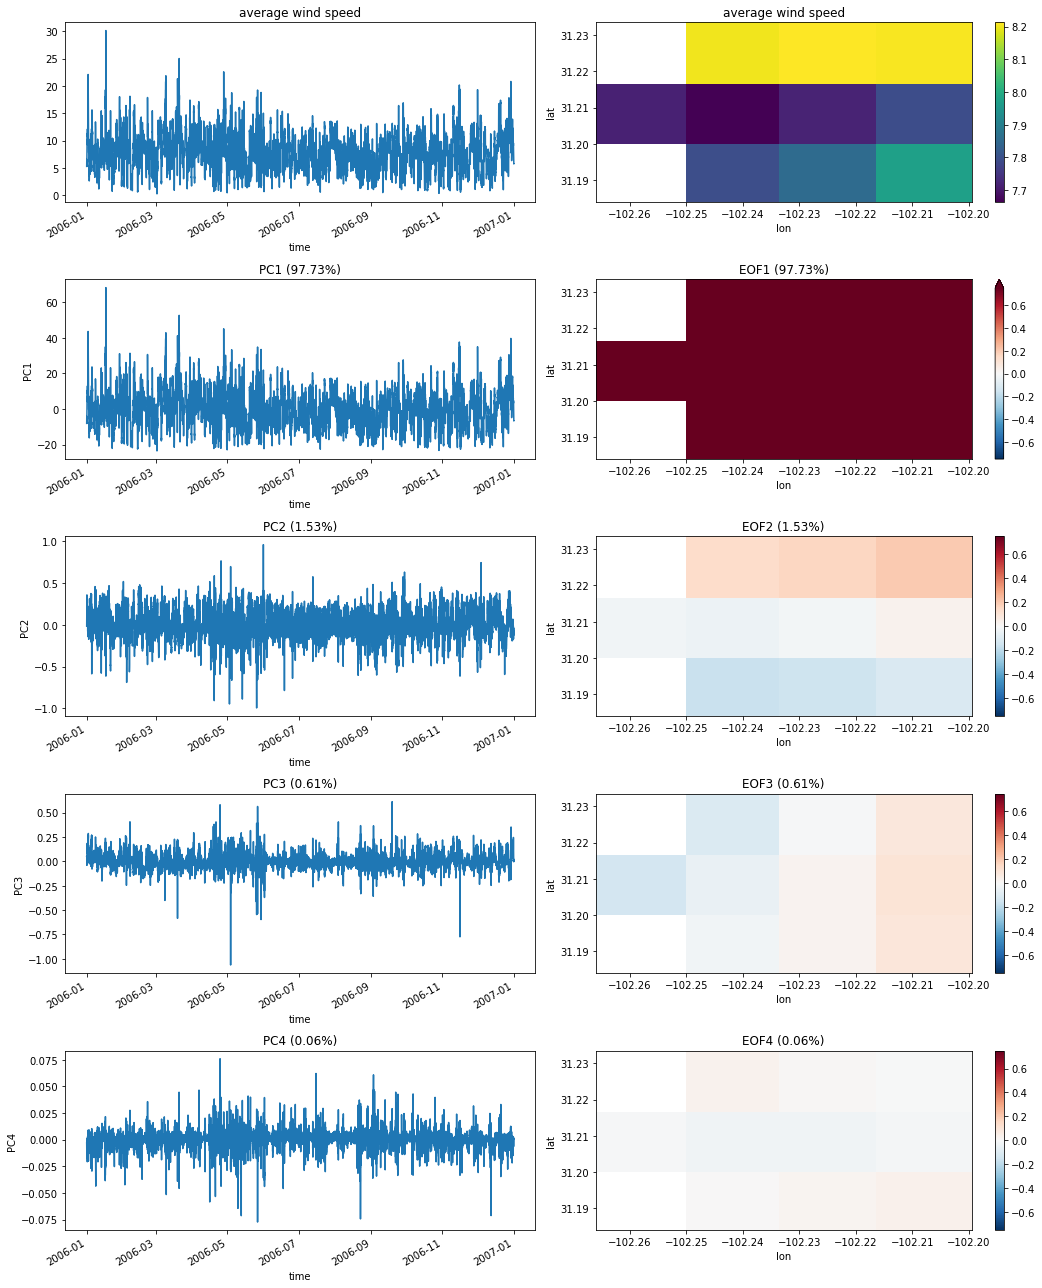

In [54]:
# EOF with eofs library
solver = Eof(StandardScaler().fit_transform(df_data.values))

s_pcs = pd.DataFrame(data=solver.pcs(npcs=4, pcscaling=2),
                     columns = pcs.columns,
                     index = pcs.index)


s_eofs = pd.DataFrame(data = solver.eofs(neofs=4, eofscaling=2),
                      columns = eofs.columns,
                      index = eofs.index)
s_eofs_da = s_eofs.stack(["lat","lon"]).to_xarray() # make it convenient for visualization

s_evfs = solver.varianceFraction(neigs=4)

# plot
visualization(da, s_pcs, s_eofs_da, s_evfs)

Text(0.5, 1.0, 'Wind Speed for TurbineID 1 (January)')

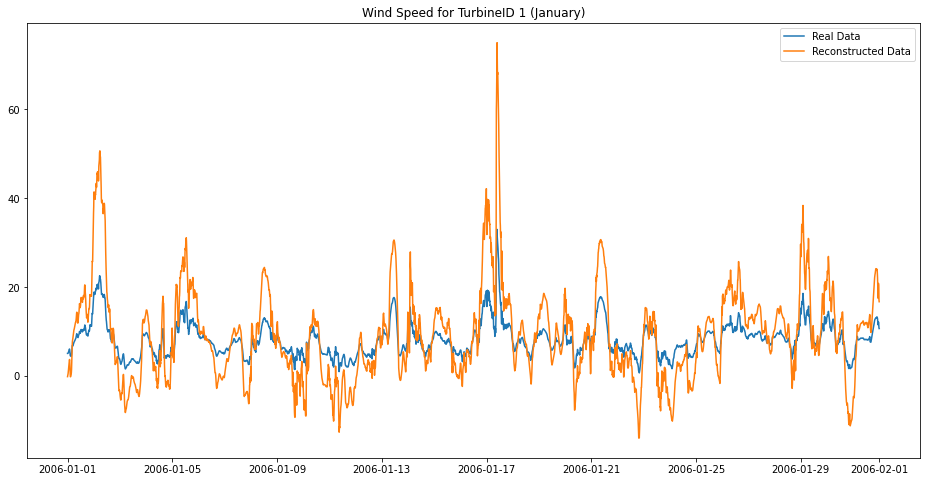

In [55]:
# Reconstructing data for wind speed based on eofs and pcs
reconstructed_data =  pd.DataFrame(np.dot(s_pcs,s_eofs))
mean = WindSpeed_df.mean()
for i in range(10):
    reconstructed_data[i] += mean[i]
                                   
#reconstructed_data

# Plotting reconstructed data for TurbineID 1 (January)

plt.figure(figsize=(16, 8))
plt.plot(data1_Jan.index, list(data1_Jan['100m wind speed (m/s)']))
plt.plot(data1_Jan.index, list(reconstructed_data[0][:len(data1_Jan)]))
plt.legend(['Real Data', 'Reconstructed Data'])
plt.title('Wind Speed for TurbineID 1 (January)')